In [1]:
from os import listdir

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split

# Data preparation

In [2]:
X = []
Y = []
for name in listdir("../ml/PetImages/Dog"):
    img = Image.open(f"../ml/PetImages/Dog/{name}")
    img = img.resize((64, 64)).convert("L")
    X.append(np.asarray(img).flatten())
    Y.append(1)


for name in listdir("../ml/PetImages/Cat"):
    img = Image.open(f"../ml/PetImages/Cat/{name}")
    img = img.resize((64, 64)).convert("L")
    X.append(np.asarray(img).flatten())
    Y.append(0)

X = np.array(X)
Y = np.array(Y)

c:\Users\ramil\Documents\Study\SPbU\BigData\sem6\MachineLearning\spbu_ml_2025\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


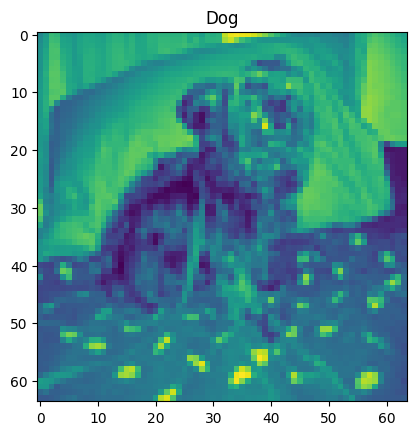

In [3]:
plt.title("Dog" if Y[0] else "Cat")
plt.imshow(X[0].reshape(64, 64))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=42)

# Modeling

In [5]:
lr = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
lr.score(X_test, Y_test)

c:\Users\ramil\Documents\Study\SPbU\BigData\sem6\MachineLearning\spbu_ml_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5312

In [6]:
rc = RidgeClassifier().fit(X_train, Y_train)
rc.score(X_test, Y_test)

0.5308

In [7]:
rfc = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
rfc.score(X_test, Y_test)

0.6476

# PCA

In [8]:
stats = pd.DataFrame(columns=["n_components", "ex_var", "lr", "rc", "rfc"])
for n_components in range(10, 210, 10):
    print(n_components)
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_pca, Y_train)
    rc = RidgeClassifier(random_state=42).fit(X_train_pca, Y_train)
    rfc = RandomForestClassifier(random_state=42).fit(X_train_pca, Y_train)

    stats.loc[len(stats)] = [n_components, np.sum(pca.explained_variance_ratio_), lr.score(X_test_pca, Y_test), rc.score(X_test_pca, Y_test), rfc.score(X_test_pca, Y_test)]


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


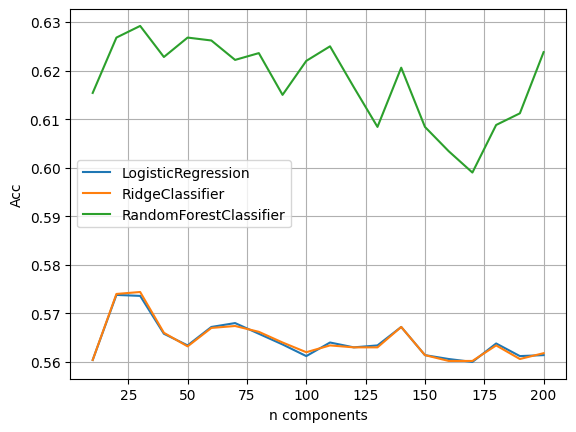

In [9]:
plt.plot(stats["n_components"], stats["lr"], label="LogisticRegression")
plt.plot(stats["n_components"], stats["rc"], label="RidgeClassifier")
plt.plot(stats["n_components"], stats["rfc"], label="RandomForestClassifier")
plt.xlabel("n components")
plt.ylabel("Acc")
plt.grid()
plt.legend()

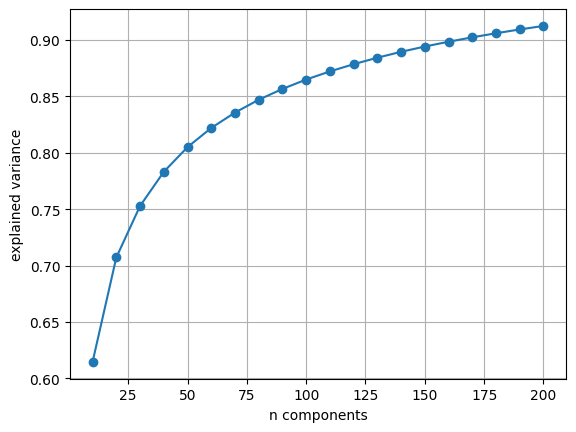

In [19]:
plt.plot(stats["n_components"], stats["ex_var"], marker='o')
plt.xlabel("n components")
plt.ylabel("explained variance")
plt.grid()

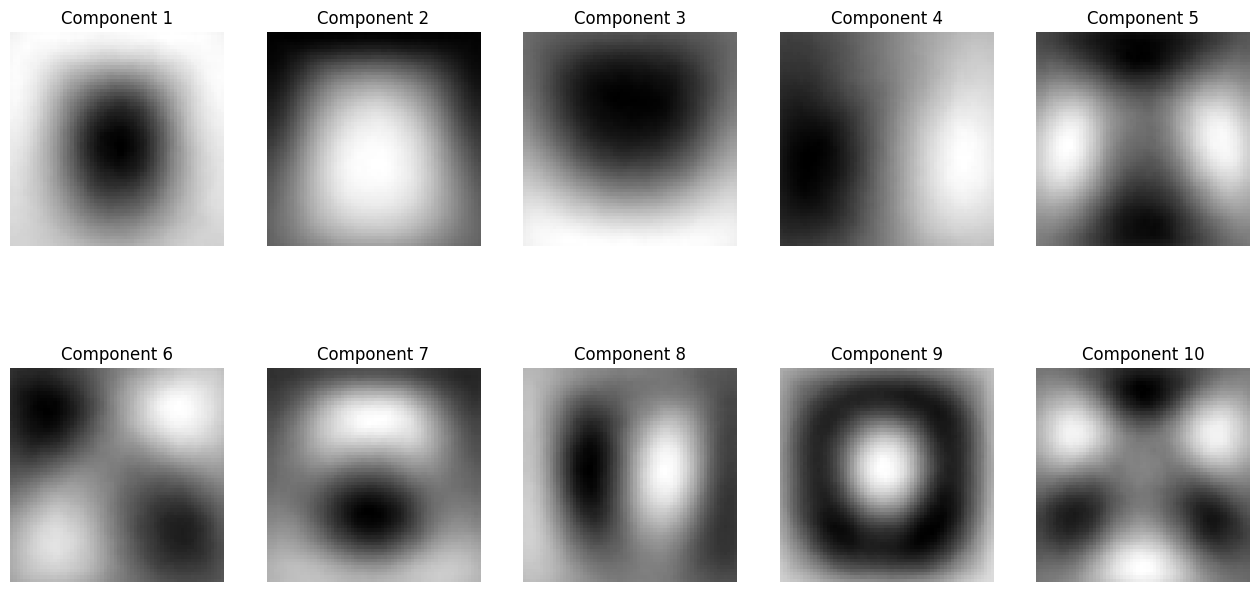

In [11]:
pca = PCA(n_components=50, random_state=42).fit(X_train)

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.set_title(f"Component {i+1}")
    ax.imshow(pca.components_[i].reshape(64, 64), cmap="gray")
    ax.axis('off')

# Conclusion

Random Forest работает лучше как с применением PCA, так и без него.  
Random Forest работает лучше всего на +- 40 компонентах PCA, при увеличении количества компонент модель начинает работать хуже и более хаотично. Связано это с появлением шума в данных.  
LogisticRegression работает лучше всего на +- 25 компонентах PCA, при увеличении количества компонент модель так же начинает работать хуже.